In [1]:
import xgboost as xgb
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
df = pd.read_csv('vascular_dementia_dataset.csv')

X = df.drop('Has Vascular Dementia', axis=1)  # Features
y = df['Has Vascular Dementia']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8585485854858549
ROC AUC Score: 0.9186851629928218


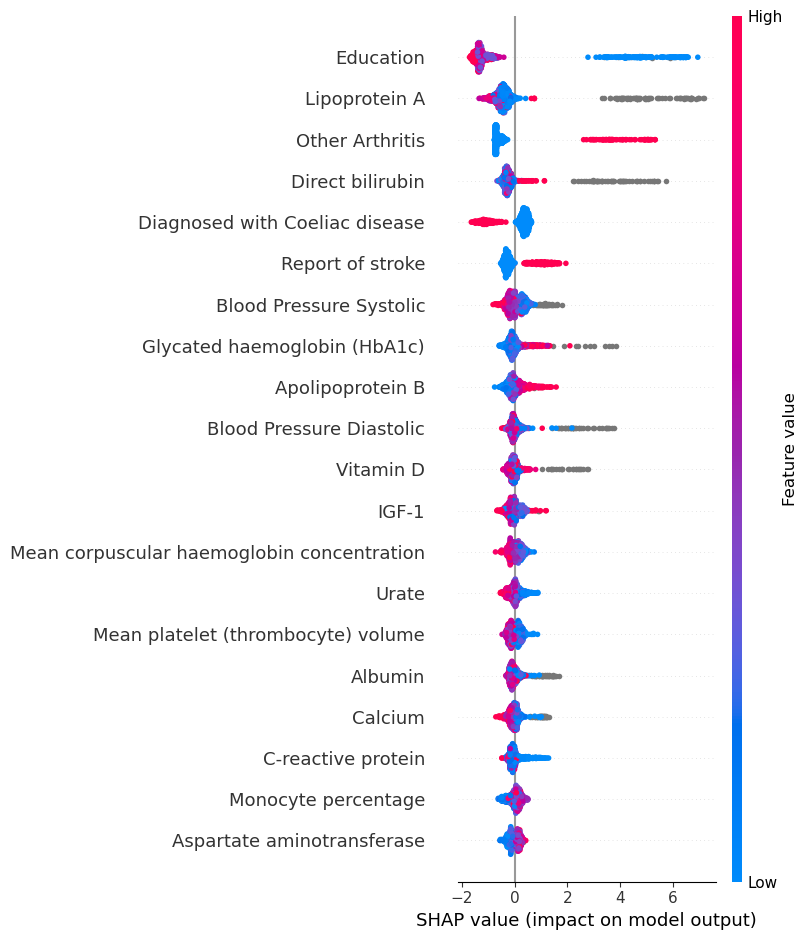

In [3]:
explainer = shap.Explainer(xgb_model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)